# Prediction of Ice Cover for St.Mary's River using Machine Learning model - XGBoost

In [1]:
# Importing  necssary libraries 

import pandas as pd
from pylab import *
import numpy as np
from matplotlib import dates
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pylab
import sys
import matplotlib.dates as mdates
from glob import glob

### Analysis for Weather station DTLM4 ###

### 1.Data Preprocessing/Data Wrangling
Data collected from Weather stations/ bouys- DTLM4, LTRM4, SWPM4 and WNEM4 along St.Mary's River were used for the analysis.The data was downloaded from NOAA Coastal watch website  

In [2]:
# Reading data of station DTLM4 (from 2007 till 2019) and creating data frames
# the output is a list of data frames
# Using glob() method to read multiple files at once - the raw data is hourly for every year

filenames = glob('C:/Users/sdavedu/Desktop/XGBoost/Weather data/DTLM4/dtlm4*.txt')
dataframes_dtlm4 = [pd.read_csv(f, delim_whitespace = True, header = 0, skiprows = 1,
                          dtype={'#yr': object, 'mo': object, 'dy': object, 'hr': object, 'mn': object}) 
              for f in filenames]

In [3]:
# Assigning the column names to all dataframes

for i in range(0, len(dataframes_dtlm4)):
    dataframes_dtlm4[i].columns = ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 
                                   'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']

In [4]:
# Concatenating the list of dataframes to form a single dataframe

df_dtlm4 = pd.concat(dataframes_dtlm4, sort = False)

In [5]:
# Checking the data in the concatenated dataframe

df_dtlm4.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2007,01,01,00,00,132,5.2,8.2,99.0,99.0,99.0,999,1006.5,2.4,999.0,999.0,99.0,99.0
1,2007,01,01,00,06,120,7.8,11.2,99.0,99.0,99.0,999,1006.0,2.5,999.0,999.0,99.0,99.0
2,2007,01,01,00,12,121,7.4,9.6,99.0,99.0,99.0,999,1005.5,2.5,999.0,999.0,99.0,99.0
3,2007,01,01,00,18,127,4.9,7.0,99.0,99.0,99.0,999,1005.4,2.6,999.0,999.0,99.0,99.0
4,2007,01,01,00,24,123,5.3,9.5,99.0,99.0,99.0,999,1005.3,2.6,999.0,999.0,99.0,99.0


In [6]:
df_dtlm4.tail()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
86234,2020,12,31,23,30,289,1.4,2.4,99.0,99.0,99.0,999,1024.5,-2.5,2.5,-5.5,99.0,99.0
86235,2020,12,31,23,36,274,1.1,2.2,99.0,99.0,99.0,999,1024.5,-2.5,2.5,-5.6,99.0,99.0
86236,2020,12,31,23,42,271,1.2,1.7,99.0,99.0,99.0,999,1024.5,-2.5,2.5,-5.5,99.0,99.0
86237,2020,12,31,23,48,255,1.0,1.9,99.0,99.0,99.0,999,1024.4,-2.5,2.5,-5.6,99.0,99.0
86238,2020,12,31,23,54,276,0.9,1.7,99.0,99.0,99.0,999,1024.6,-2.6,2.5,-5.6,99.0,99.0


### 2. Explaratory Data Analysis

In [7]:
#Checking the information of the dataframe
df_dtlm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200021 entries, 0 to 86238
Data columns (total 18 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   YY      1200021 non-null  object 
 1   MM      1200021 non-null  object 
 2   DD      1200021 non-null  object 
 3   hh      1200021 non-null  object 
 4   mm      1200021 non-null  object 
 5   WDIR    1200021 non-null  int64  
 6   WSPD    1200021 non-null  float64
 7   GST     1200021 non-null  float64
 8   WVHT    1200021 non-null  float64
 9   DPD     1200021 non-null  float64
 10  APD     1200021 non-null  float64
 11  MWD     1200021 non-null  int64  
 12  PRES    1200021 non-null  float64
 13  ATMP    1200021 non-null  float64
 14  WTMP    1200021 non-null  float64
 15  DEWP    1200021 non-null  float64
 16  VIS     1200021 non-null  float64
 17  TIDE    1200021 non-null  float64
dtypes: float64(11), int64(2), object(5)
memory usage: 174.0+ MB


In [8]:
# Displaying the distribution of all numerical variables

df_dtlm4.describe()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,1.200021e+06,1.200021e+06,1.200021e+06,1200021.0,1200021.0,1200021.0,1200021.0,1.200021e+06,1.200021e+06,1.200021e+06,1.200021e+06,1200021.0,1200021.0
mean,2.196575e+02,5.446573e+00,7.296372e+00,99.0,99.0,99.0,999.0,1.698834e+03,2.869790e+01,8.367744e+02,5.362714e+02,99.0,99.0
std,1.440034e+02,1.237253e+01,1.257341e+01,0.0,0.0,0.0,0.0,2.382141e+03,1.491832e+02,3.667210e+02,4.966430e+02,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,99.0,99.0,99.0,999.0,9.751000e+02,-3.280000e+01,6.000000e-01,-3.550000e+01,99.0,99.0
25%,1.440000e+02,2.300000e+00,3.400000e+00,99.0,99.0,99.0,999.0,1.010900e+03,-1.400000e+00,9.990000e+02,4.600000e+00,99.0,99.0
50%,2.160000e+02,3.500000e+00,5.300000e+00,99.0,99.0,99.0,999.0,1.016200e+03,6.600000e+00,9.990000e+02,9.990000e+02,99.0,99.0
75%,3.040000e+02,5.200000e+00,7.700000e+00,99.0,99.0,99.0,999.0,1.021900e+03,1.540000e+01,9.990000e+02,9.990000e+02,99.0,99.0
max,9.990000e+02,9.900000e+01,9.900000e+01,99.0,99.0,99.0,999.0,9.999000e+03,9.990000e+02,9.990000e+02,9.990000e+02,99.0,99.0


In [9]:
# Replacing bad data/missing values(99, 999 and 9999...) by NaN 
df_dtlm4.replace(99,np.nan,inplace=True)
df_dtlm4.replace(999,np.nan,inplace=True)
df_dtlm4.replace(99.0,np.nan,inplace=True)
df_dtlm4.replace(999.0,np.nan,inplace=True)
df_dtlm4.replace(9999.0,np.nan,inplace=True)

In [10]:
# Combining 'YY', 'MM', 'DD', 'hh' and 'mm' features to form a Pandas datetime feature

df_dtlm4["dateTime"] = df_dtlm4["YY"].astype(str) + df_dtlm4["MM"].astype(str) + df_dtlm4["DD"].astype(str) + df_dtlm4["hh"].astype(str) + df_dtlm4["mm"].astype(str)
# convert the datetime to a list
dfList = df_dtlm4["dateTime"].tolist()
# create a new empty list to hold true datetime values
dateList = []
# run datetime function
for d in dfList:
    dates = datetime.strptime(d, '%Y%m%d%H%M')
    dateList.append(dates)
#a = ["YYMMDDhhmm"]
#dateListnew = a + dateList
# add the list as a new column to the dataframe
df_dtlm4["dateTime"] = dateList

In [11]:
df_dtlm4.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,dateTime
0,2007,01,01,00,00,132.0,5.2,8.2,NaN,NaN,NaN,NaN,1006.5,2.4,NaN,NaN,NaN,NaN,2007-01-01 00:00:00
1,2007,01,01,00,06,120.0,7.8,11.2,NaN,NaN,NaN,NaN,1006.0,2.5,NaN,NaN,NaN,NaN,2007-01-01 00:06:00
2,2007,01,01,00,12,121.0,7.4,9.6,NaN,NaN,NaN,NaN,1005.5,2.5,NaN,NaN,NaN,NaN,2007-01-01 00:12:00
3,2007,01,01,00,18,127.0,4.9,7.0,NaN,NaN,NaN,NaN,1005.4,2.6,NaN,NaN,NaN,NaN,2007-01-01 00:18:00
4,2007,01,01,00,24,123.0,5.3,9.5,NaN,NaN,NaN,NaN,1005.3,2.6,NaN,NaN,NaN,NaN,2007-01-01 00:24:00


In [12]:
# Dropping YY,MM,DD,hh,mm columns since we have the datetime feature

df_dtlm4 = df_dtlm4.drop(['YY', 'MM', 'DD', 'hh', 'mm'], axis = 1)
df_dtlm4.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,dateTime
0,132.0,5.2,8.2,NaN,NaN,NaN,NaN,1006.5,2.4,NaN,NaN,NaN,NaN,2007-01-01 00:00:00
1,120.0,7.8,11.2,NaN,NaN,NaN,NaN,1006.0,2.5,NaN,NaN,NaN,NaN,2007-01-01 00:06:00
2,121.0,7.4,9.6,NaN,NaN,NaN,NaN,1005.5,2.5,NaN,NaN,NaN,NaN,2007-01-01 00:12:00
3,127.0,4.9,7.0,NaN,NaN,NaN,NaN,1005.4,2.6,NaN,NaN,NaN,NaN,2007-01-01 00:18:00
4,123.0,5.3,9.5,NaN,NaN,NaN,NaN,1005.3,2.6,NaN,NaN,NaN,NaN,2007-01-01 00:24:00


In [13]:
# Setting the dateTime feature as an index

df_dtlm4 = df_dtlm4.set_index(['dateTime'])
df_dtlm4.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dateTime,,,,,,,,,,,,,
2007-01-01 00:00:00,132.0,5.2,8.2,NaN,NaN,NaN,NaN,1006.5,2.4,NaN,NaN,NaN,NaN
2007-01-01 00:06:00,120.0,7.8,11.2,NaN,NaN,NaN,NaN,1006.0,2.5,NaN,NaN,NaN,NaN
2007-01-01 00:12:00,121.0,7.4,9.6,NaN,NaN,NaN,NaN,1005.5,2.5,NaN,NaN,NaN,NaN
2007-01-01 00:18:00,127.0,4.9,7.0,NaN,NaN,NaN,NaN,1005.4,2.6,NaN,NaN,NaN,NaN
2007-01-01 00:24:00,123.0,5.3,9.5,NaN,NaN,NaN,NaN,1005.3,2.6,NaN,NaN,NaN,NaN


In [14]:
df_dtlm4.tail()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dateTime,,,,,,,,,,,,,
2020-12-31 23:30:00,289.0,1.4,2.4,NaN,NaN,NaN,NaN,1024.5,-2.5,2.5,-5.5,NaN,NaN
2020-12-31 23:36:00,274.0,1.1,2.2,NaN,NaN,NaN,NaN,1024.5,-2.5,2.5,-5.6,NaN,NaN
2020-12-31 23:42:00,271.0,1.2,1.7,NaN,NaN,NaN,NaN,1024.5,-2.5,2.5,-5.5,NaN,NaN
2020-12-31 23:48:00,255.0,1.0,1.9,NaN,NaN,NaN,NaN,1024.4,-2.5,2.5,-5.6,NaN,NaN
2020-12-31 23:54:00,276.0,0.9,1.7,NaN,NaN,NaN,NaN,1024.6,-2.6,2.5,-5.6,NaN,NaN


In [15]:
# Grouping the data at a daily level since the current observations are at a 6 minute interval
# Every record contains the mean value for the day across all years

df_dtlm4_d = df_dtlm4.resample('D').mean()
df_dtlm4_clim = df_dtlm4_d.groupby(df_dtlm4_d.index.dayofyear).mean()
df_dtlm4_clim.index = pd.to_datetime(df_dtlm4_clim.index,format='%j')

In [16]:
print(df_dtlm4_d.shape)
print(df_dtlm4_clim.shape)

(5114, 13)
(366, 13)


In [17]:
#Checking the mising data in the dataframe
#"True" indicates missing value and "False" indicates no missing values
missing_data = df_dtlm4.isnull()
missing_data.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dateTime,,,,,,,,,,,,,
2007-01-01 00:00:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2007-01-01 00:06:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2007-01-01 00:12:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2007-01-01 00:18:00,False,False,False,True,True,True,True,False,False,True,True,True,True
2007-01-01 00:24:00,False,False,False,True,True,True,True,False,False,True,True,True,True


In [18]:
#counting the missing values in all features.
#True indicates missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

WDIR
False    1178870
True       21151
Name: WDIR, dtype: int64

WSPD
False    1180064
True       19957
Name: WSPD, dtype: int64

GST
False    1179203
True       20818
Name: GST, dtype: int64

WVHT
True    1200021
Name: WVHT, dtype: int64

DPD
True    1200021
Name: DPD, dtype: int64

APD
True    1200021
Name: APD, dtype: int64

MWD
True    1200021
Name: MWD, dtype: int64

PRES
False    1107991
True       92030
Name: PRES, dtype: int64

ATMP
False    1172441
True       27580
Name: ATMP, dtype: int64

WTMP
True     1003615
False     196406
Name: WTMP, dtype: int64

DEWP
True     642316
False    557705
Name: DEWP, dtype: int64

VIS
True    1200021
Name: VIS, dtype: int64

TIDE
True    1200021
Name: TIDE, dtype: int64



In [19]:
# Dropping the features with mostly missing values 

df_dtlm4_d = df_dtlm4_d.drop(['WVHT', 'DPD', 'APD', 'MWD', 'WTMP', 'DEWP', 'VIS', 'TIDE'], axis = 1)

In [20]:
# Reading the Ice data using glob package into a list of dataframes
# Raw data has Ice cover values for the 4 stations and mean ice coverage from years 2004 to 2020
# the output is a list of dataframes

filenames = glob('C:/Users/sdavedu/Desktop/XGBoost/Ice data/timeseries*.xlsx')
dataframes_ice = [pd.read_excel(f, index_col = 0, header = 0) for f in filenames]

In [21]:
#Concatenating the dataframes into a single dataframe
df_ice_dtlm4 = pd.concat(dataframes_ice, sort = False)
df_ice_dtlm4.head()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
date,,,,,
2007-01-01,8.622266,10.002140,4.997253,4.997253,4.997253
2007-01-02,8.939786,8.003235,4.997253,10.002140,4.997253
2007-01-03,9.526155,7.003784,4.997253,14.999390,4.997253
2007-01-04,9.842561,4.997253,4.997253,19.996639,4.997253
2007-01-05,7.551686,3.997803,3.997803,14.999390,3.997803


In [22]:
df_ice_dtlm4.tail()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
date,,,,,
2020-05-19,0.0,0.0,0.0,0.0,0.0
2020-05-20,0.0,0.0,0.0,0.0,0.0
2020-05-21,0.0,0.0,0.0,0.0,0.0
2020-05-22,0.0,0.0,0.0,0.0,0.0
2020-05-23,0.0,0.0,0.0,0.0,0.0


In [23]:
df_ice_dtlm4.describe()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000
mean,44.424263,44.648016,46.084694,46.439591,33.109071
std,43.082660,46.133818,46.444855,47.192298,43.198345
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.250244,19.996639,19.996639,19.996639,0.000000
75%,93.285090,99.998466,99.998466,99.998466,89.996338
max,99.998464,99.998466,99.998466,99.998466,99.998466


In [24]:
# Retaining just the Ice cover of the station DTLM4 from the ice dataframe i.e. retaining only "DTLM" column

df_ice_dtlm4 = df_ice_dtlm4.drop(['mean_icecoverage', 'LTRM', 'SWPM', 'WNEM'], axis = 1)

In [25]:
# Merging the weather station dataframe with the ice dataframe

df_merge = pd.merge(df_dtlm4_d, df_ice_dtlm4, how = 'inner', left_index = True, right_index = True)
df_merge.head()

,WDIR,WSPD,GST,PRES,ATMP,DTLM
2007-01-01,227.338912,4.230962,7.210460,1002.065823,2.865272,4.997253
2007-01-02,257.075314,3.089121,5.180335,1020.045607,0.913983,4.997253
2007-01-03,215.150000,3.974167,6.915833,1012.742917,3.069583,4.997253
2007-01-04,192.661088,3.419247,5.260669,1005.601255,4.332218,4.997253
2007-01-05,214.762500,2.280417,3.455000,1001.480342,4.954167,3.997803


In [26]:
df_merge.tail()

,WDIR,WSPD,GST,PRES,ATMP,DTLM
2020-05-19,84.615063,6.766667,8.756667,1022.442500,12.963333,0.0
2020-05-20,117.753138,4.075833,5.021250,1024.527083,12.125523,0.0
2020-05-21,162.195833,2.327083,3.006667,1022.666527,10.237657,0.0
2020-05-22,136.800000,2.159167,2.817917,1018.115833,11.149789,0.0
2020-05-23,161.508333,2.594167,3.298750,1016.088285,12.172803,0.0


In [27]:
#In addition to the numeric values, WDIR - wind direction has the direction labels as well. i.e. North-West, South etc.
#Analysing these directions here

def label_wdir(data):
    if data['WDIR'] == 0.0 :
        return 'North'
    if data['WDIR'] == 90.0 :
        return 'East'
    if data['WDIR'] == 180.0 :
        return 'South'
    if data['WDIR'] == 270.0 :
        return 'West'
    if 0 < data['WDIR'] < 90 :
        return 'North-East'
    if 90 < data['WDIR'] < 180 :
        return 'South-East'
    if 180 < data['WDIR'] < 270 :
        return 'South-West'
    if 270 < data['WDIR'] < 360 :
        return 'North-West'
    return 'Unknown'
df_merge['Direction'] = df_merge.apply(lambda data: label_wdir(data), axis = 1)

In [28]:
df_merge['Direction'].value_counts()

South-West    1490
South-East     973
North-West     628
North-East     176
Unknown         26
Name: Direction, dtype: int64

In [29]:
df_merge = df_merge[df_merge['Direction'] != 'Unknown']

In [30]:
#Breaking WDIR into degrees in specific directions 

def wind_magnitude(data) :
    if 90 < data['WDIR'] < 180:
        return data['WDIR']-90
    if 180 < data['WDIR'] < 270:
        return data['WDIR']-180
    if 270 < data['WDIR'] < 360:
        return data['WDIR']-270
    return data['WDIR']

df_merge['WDIR_New'] = df_merge.apply(lambda data: wind_magnitude(data), axis = 1)

df_merge['WDIR_New'].describe()

count    3267.000000
mean       44.960762
std        25.953975
min         0.016807
25%        22.572106
50%        45.025862
75%        67.312755
max        89.924051
Name: WDIR_New, dtype: float64

In [31]:
df_merge = pd.get_dummies(df_merge, prefix=['Wind'], columns = ['Direction'], drop_first=True)
df_merge.head()

,WDIR,WSPD,GST,PRES,ATMP,DTLM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West
2007-01-01,227.338912,4.230962,7.210460,1002.065823,2.865272,4.997253,47.338912,0,0,1
2007-01-02,257.075314,3.089121,5.180335,1020.045607,0.913983,4.997253,77.075314,0,0,1
2007-01-03,215.150000,3.974167,6.915833,1012.742917,3.069583,4.997253,35.150000,0,0,1
2007-01-04,192.661088,3.419247,5.260669,1005.601255,4.332218,4.997253,12.661088,0,0,1
2007-01-05,214.762500,2.280417,3.455000,1001.480342,4.954167,3.997803,34.762500,0,0,1


In [32]:
df_merge = df_merge.drop(['WDIR'], axis = 1)
df_merge.head()

,WSPD,GST,PRES,ATMP,DTLM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West
2007-01-01,4.230962,7.210460,1002.065823,2.865272,4.997253,47.338912,0,0,1
2007-01-02,3.089121,5.180335,1020.045607,0.913983,4.997253,77.075314,0,0,1
2007-01-03,3.974167,6.915833,1012.742917,3.069583,4.997253,35.150000,0,0,1
2007-01-04,3.419247,5.260669,1005.601255,4.332218,4.997253,12.661088,0,0,1
2007-01-05,2.280417,3.455000,1001.480342,4.954167,3.997803,34.762500,0,0,1


In [33]:
df_merge.shape

(3267, 9)

#### 3. XGBoost Model development - DTLM4

In [34]:
######### Creating lags and moving averages for Ice cover (DTLM) and Air Temperature(ATMP) features ################

for i in range(1,6):
    col = 'ATMP_lag_' + str(i)
    df_merge[col] = df_merge['ATMP'].shift(i)

for i in range(1,6):
    col = 'Ice_lag_' + str(i)
    df_merge[col] = df_merge['DTLM'].shift(i)

for i in range(3,6):
    col = 'ATMP_RM_' + str(i)
    df_merge[col] = df_merge['ATMP'].rolling(i).mean()
    df_merge[col] = df_merge[col].shift(1)

for i in range(3,6):
    col = 'Ice_RM_' + str(i)
    df_merge[col] = df_merge['DTLM'].rolling(i).mean()
    df_merge[col] = df_merge[col].shift(1)

df_merge.head()

,WSPD,GST,PRES,ATMP,DTLM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,Ice_lag_2,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5
2007-01-01,4.230962,7.210460,1002.065823,2.865272,4.997253,47.338912,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,3.089121,5.180335,1020.045607,0.913983,4.997253,77.075314,0,0,1,2.865272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,3.974167,6.915833,1012.742917,3.069583,4.997253,35.150000,0,0,1,0.913983,...,4.997253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,3.419247,5.260669,1005.601255,4.332218,4.997253,12.661088,0,0,1,3.069583,...,4.997253,4.997253,NaN,NaN,2.282946,NaN,NaN,4.997253,NaN,NaN
2007-01-05,2.280417,3.455000,1001.480342,4.954167,3.997803,34.762500,0,0,1,4.332218,...,4.997253,4.997253,4.997253,NaN,2.771928,2.795264,NaN,4.997253,4.997253,NaN


In [35]:
df_merge['PRES'].describe()

count    3015.000000
mean     1015.259383
std         7.879483
min       985.688936
25%      1010.144951
50%      1015.463677
75%      1020.660829
max      1040.008787
Name: PRES, dtype: float64

In [36]:
# For Pressure feature, creating z-score as an additional feature
cols = ['PRES']

for col in cols:
    col_zscore = col + '_zscore'
    df_merge[col_zscore] = (df_merge[col] - df_merge[col].mean())/df_merge[col].std(ddof=0)

df_merge.head()

,WSPD,GST,PRES,ATMP,DTLM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore
2007-01-01,4.230962,7.210460,1002.065823,2.865272,4.997253,47.338912,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.674697
2007-01-02,3.089121,5.180335,1020.045607,0.913983,4.997253,77.075314,0,0,1,2.865272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607529
2007-01-03,3.974167,6.915833,1012.742917,3.069583,4.997253,35.150000,0,0,1,0.913983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.319422
2007-01-04,3.419247,5.260669,1005.601255,4.332218,4.997253,12.661088,0,0,1,3.069583,...,4.997253,NaN,NaN,2.282946,NaN,NaN,4.997253,NaN,NaN,-1.225934
2007-01-05,2.280417,3.455000,1001.480342,4.954167,3.997803,34.762500,0,0,1,4.332218,...,4.997253,4.997253,NaN,2.771928,2.795264,NaN,4.997253,4.997253,NaN,-1.749014


In [37]:
df_merge[['WSPD', 'GST', 'PRES', 'ATMP', 'DTLM', 'PRES_zscore']].head()

,WSPD,GST,PRES,ATMP,DTLM,PRES_zscore
2007-01-01,4.230962,7.210460,1002.065823,2.865272,4.997253,-1.674697
2007-01-02,3.089121,5.180335,1020.045607,0.913983,4.997253,0.607529
2007-01-03,3.974167,6.915833,1012.742917,3.069583,4.997253,-0.319422
2007-01-04,3.419247,5.260669,1005.601255,4.332218,4.997253,-1.225934
2007-01-05,2.280417,3.455000,1001.480342,4.954167,3.997803,-1.749014


In [38]:
df_merge_ice_on_off = df_merge[['WSPD', 'GST', 'PRES', 'ATMP', 'DTLM']]
df_merge_ice_on_off.head(10)

,WSPD,GST,PRES,ATMP,DTLM
2007-01-01,4.230962,7.210460,1002.065823,2.865272,4.997253
2007-01-02,3.089121,5.180335,1020.045607,0.913983,4.997253
2007-01-03,3.974167,6.915833,1012.742917,3.069583,4.997253
2007-01-04,3.419247,5.260669,1005.601255,4.332218,4.997253
2007-01-05,2.280417,3.455000,1001.480342,4.954167,3.997803
2007-01-06,2.464167,4.297500,1005.758333,2.108333,2.998352
2007-01-07,6.547368,8.652632,1015.481203,2.061654,0.999451
2007-01-08,4.835000,7.232500,1001.454237,-0.219583,0.000000
2007-01-09,4.253750,7.354583,1006.230417,-4.732500,1.998901
2007-01-10,2.354583,3.792083,1019.895833,-8.364167,2.998352


In [39]:
df_merge_ice_on_off['month'] = pd.DatetimeIndex(df_merge_ice_on_off.index).month
df_merge_ice_on_off['year'] = pd.DatetimeIndex(df_merge_ice_on_off.index).year
df_merge_ice_on_off['day'] = pd.DatetimeIndex(df_merge_ice_on_off.index).day

df_merge_ice_on_off['Ice_RM_3'] = df_merge_ice_on_off['DTLM'].rolling(3).mean()

df_ice_off = df_merge_ice_on_off[(df_merge_ice_on_off['month'] <= 7) & (df_merge_ice_on_off['month'] > 1)]
df_ice_on = df_merge_ice_on_off[(df_merge_ice_on_off['month'] > 7)]

df_ice_on['Ice_on_off'] = np.where(df_ice_on['Ice_RM_3'] >= 10, 'Ice_on_date', 'Normal')
df_ice_on = df_ice_on[df_ice_on['Ice_on_off'] != 'Normal']
df_ice_on = df_ice_on.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['Ice_RM_3'] <= 10), 'Ice_off_date', 'Normal')
df_ice_off = df_ice_off[df_ice_off['Ice_on_off'] != 'Normal']
df_ice_off = df_ice_off.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_merge_ice_on_off = pd.concat([df_ice_off, df_ice_on], axis = 0)
df_merge_ice_on_off = df_merge_ice_on_off.reset_index()
df_merge_ice_on_off = df_merge_ice_on_off.sort_values(by = 'index')
df_merge_ice_on_off = df_merge_ice_on_off.set_index('index')

df_merge_ice_on_off = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] != 'Normal']

df_merge_ice_on_off

<ipython-input-39-7fd56f4d35b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_ice_on_off['month'] = pd.DatetimeIndex(df_merge_ice_on_off.index).month
<ipython-input-39-7fd56f4d35b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_ice_on_off['year'] = pd.DatetimeIndex(df_merge_ice_on_off.index).year
<ipython-input-39-7fd56f4d35b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,WSPD,GST,PRES,ATMP,DTLM,month,year,day,Ice_RM_3,Ice_on_off
index,,,,,,,,,,
2007-04-01,5.167089,7.650211,1010.205485,2.838397,4.997253,4,2007,1,4.997253e+00,Ice_off_date
2007-12-10,1.973333,3.129167,1024.972917,-5.837917,19.996639,12,2007,10,1.333109e+01,Ice_on_date
2008-04-03,2.615417,4.043750,1023.385833,2.845833,19.996639,4,2008,3,9.997048e+00,Ice_off_date
2008-12-10,4.250840,5.742857,NaN,-12.418487,95.001221,12,2008,10,3.166707e+01,Ice_on_date
2009-04-14,4.007917,5.066667,NaN,3.703750,4.997253,4,2009,14,8.333844e+00,Ice_off_date
2009-12-24,5.515417,7.052917,1029.667083,-5.248750,95.001221,12,2009,24,3.499858e+01,Ice_on_date
2010-04-01,3.936820,5.047059,1009.941004,6.690377,4.997253,4,2010,1,4.997253e+00,Ice_off_date
2010-12-14,5.922917,9.555649,1016.853333,-15.143750,80.001831,12,2010,14,2.999878e+01,Ice_on_date
2011-04-12,3.042083,4.422083,1017.744167,3.222917,0.000000,4,2011,12,9.999593e+00,Ice_off_date


In [40]:
df_ice = pd.concat(dataframes_ice, sort = False)
df_ice = df_ice.reset_index()
df_ice.head()

,date,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
0,2007-01-01,8.622266,10.002140,4.997253,4.997253,4.997253
1,2007-01-02,8.939786,8.003235,4.997253,10.002140,4.997253
2,2007-01-03,9.526155,7.003784,4.997253,14.999390,4.997253
3,2007-01-04,9.842561,4.997253,4.997253,19.996639,4.997253
4,2007-01-05,7.551686,3.997803,3.997803,14.999390,3.997803


In [41]:
# Importing packages for XGBoost and K-fold Gridsearch

import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [42]:
# Separating the Independent and dependent variables

X = df_merge.drop(['DTLM'], axis = 1)
y = df_merge['DTLM']

# Creating training and validation data for model building

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

In [43]:
X_train = X['2007-01-01':'2015-12-31']
X_test = X['2016-01-01':'2019-12-31']
y_train = y['2007-01-01':'2015-12-31']
y_test = y['2016-01-01':'2019-12-31']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2156, 25) (2156,)
(967, 25) (967,)


In [44]:
X_valid = X['2020-01-01':'2020-12-31']
y_valid = y['2020-01-01':'2020-12-31']

In [45]:
X_valid

,WSPD,GST,PRES,ATMP,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,ATMP_lag_2,...,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore
2020-01-01,3.857143,6.244958,1001.014407,-2.493534,72.500000,0,0,1,-0.062979,-0.032189,...,80.001831,80.001831,89.996338,0.129651,0.124759,0.509681,6.666565e+01,6.999969e+01,7.399902e+01,-1.808156
2020-01-02,3.366527,5.553975,996.624268,2.164681,22.610879,0,0,1,-2.493534,-0.062979,...,59.997559,80.001831,80.001831,-0.862901,-0.526145,-0.398900,4.333242e+01,5.249977e+01,5.800018e+01,-2.365410
2020-01-03,2.573222,4.471548,1004.022553,0.645259,9.422594,1,0,0,2.164681,-2.493534,...,59.997559,59.997559,80.001831,-0.130611,-0.106005,0.012020,2.666728e+01,3.499985e+01,4.400025e+01,-1.426324
2020-01-04,2.225941,3.298326,1010.140336,-2.253361,43.610879,0,0,1,0.645259,2.164681,...,10.002140,59.997559,59.997559,0.105468,0.063357,0.044247,1.000214e+01,2.250099e+01,3.000031e+01,-0.649776
2020-01-05,3.667083,5.233750,1011.475732,-1.869038,57.595833,0,0,1,-2.253361,0.645259,...,10.002140,10.002140,59.997559,0.185526,-0.484239,-0.399987,3.333537e+01,2.750206e+01,3.400116e+01,-0.480270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-19,6.766667,8.756667,1022.442500,12.963333,84.615063,0,0,0,11.975949,9.260338,...,0.000000,0.000000,0.000000,9.448068,8.811264,8.034033,2.368476e-15,1.776357e-15,1.421085e-15,0.911774
2020-05-20,4.075833,5.021250,1024.527083,12.125523,27.753138,0,1,0,12.963333,11.975949,...,0.000000,0.000000,0.000000,11.399873,10.326884,9.641678,2.368476e-15,1.776357e-15,1.421085e-15,1.176376
2020-05-21,2.327083,3.006667,1022.666527,10.237657,72.195833,0,1,0,12.125523,12.963333,...,0.000000,0.000000,0.000000,12.354935,11.581286,10.686612,2.368476e-15,1.776357e-15,1.421085e-15,0.940211
2020-05-22,2.159167,2.817917,1018.115833,11.149789,46.800000,0,1,0,10.237657,12.125523,...,0.000000,0.000000,0.000000,11.775504,11.825616,11.312560,2.368476e-15,1.776357e-15,1.421085e-15,0.362578


In [46]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4, 5],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   45.5s finished


0.8082778366555642
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}
Time to train = 45.91 seconds


In [47]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

6.275982487361865


In [48]:
# Predicting on the test data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)

print(mean_absolute_error(y_test, y_test_pred))

8.745870831056768


In [49]:
# Predicting on the validation data and calculating the mean absolute error

y_valid_pred = xgb_grid.predict(X_valid)

print(mean_absolute_error(y_valid, y_valid_pred))

17.139370018137722


In [50]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

df_valid = X_valid.copy()
df_valid['y_valid'] = y_valid
df_valid['y_valid_pred'] = y_valid_pred

In [51]:
df_test = df_test[['WSPD', 'GST', 'PRES', 'ATMP', 'y_test', 'y_test_pred']]
df_valid = df_valid[['WSPD', 'GST', 'PRES', 'ATMP', 'y_valid', 'y_valid_pred']]
df_train = df_train[['WSPD', 'GST', 'PRES', 'ATMP', 'y_train', 'y_train_pred']]

df_test.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'DTLM', 'DTLM_Pred']
df_valid.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'DTLM', 'DTLM_Pred']
df_train.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'DTLM', 'DTLM_Pred']


df_test['DTLM_Pred_RM_3'] = df_test['DTLM_Pred'].rolling(3).mean()
#df_test['DTLM_Pred_RM_3'] = df_test['DTLM_Pred_RM_3'].shift(1)

df_valid['DTLM_Pred_RM_3'] = df_valid['DTLM_Pred'].rolling(3).mean()

df_train['DTLM_Pred_RM_3'] = df_train['DTLM_Pred'].rolling(3).mean()
#df_train['DTLM_Pred_RM_3'] = df_train['DTLM_Pred_RM_3'].shift(1)

df_ml = pd.concat([df_train, df_test, df_valid], axis = 0)
df_ml.head()

,WSPD,GST,PRES,ATMP,DTLM,DTLM_Pred,DTLM_Pred_RM_3
2007-01-01,4.230962,7.210460,1002.065823,2.865272,4.997253,9.153117,NaN
2007-01-02,3.089121,5.180335,1020.045607,0.913983,4.997253,2.655304,NaN
2007-01-03,3.974167,6.915833,1012.742917,3.069583,4.997253,1.758514,4.522312
2007-01-04,3.419247,5.260669,1005.601255,4.332218,4.997253,1.905364,2.106394
2007-01-05,2.280417,3.455000,1001.480342,4.954167,3.997803,5.706571,3.123483


In [52]:
df_ml.tail()

,WSPD,GST,PRES,ATMP,DTLM,DTLM_Pred,DTLM_Pred_RM_3
2020-05-19,6.766667,8.756667,1022.442500,12.963333,0.0,1.894211,2.112916
2020-05-20,4.075833,5.021250,1024.527083,12.125523,0.0,2.608268,2.112916
2020-05-21,2.327083,3.006667,1022.666527,10.237657,0.0,2.594292,2.365590
2020-05-22,2.159167,2.817917,1018.115833,11.149789,0.0,2.608268,2.603609
2020-05-23,2.594167,3.298750,1016.088285,12.172803,0.0,2.594292,2.598951


In [53]:
df_ml['month'] = pd.DatetimeIndex(df_ml.index).month
df_ml['year'] = pd.DatetimeIndex(df_ml.index).year
df_ml['day'] = pd.DatetimeIndex(df_ml.index).day

df_ice_off = df_ml[(df_ml['month'] <= 7) & (df_ml['month'] > 1)]
df_ice_on = df_ml[(df_ml['month'] > 7)]

df_ice_on['Ice_on_off'] = np.where(df_ice_on['DTLM_Pred_RM_3'] >= 10, 'Ice_on_date', 'Normal')
df_ice_on = df_ice_on[df_ice_on['Ice_on_off'] != 'Normal']
df_ice_on = df_ice_on.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['DTLM_Pred_RM_3'] <= 10), 'Ice_off_date', 'Normal')
df_ice_off = df_ice_off[df_ice_off['Ice_on_off'] != 'Normal']
df_ice_off = df_ice_off.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ml = pd.concat([df_ice_off, df_ice_on], axis = 0)
df_ml = df_ml.reset_index()
df_ml = df_ml.sort_values(by = 'index')
df_ml = df_ml.set_index('index')

df_ml

<ipython-input-53-a971b26fe352>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ice_on['Ice_on_off'] = np.where(df_ice_on['DTLM_Pred_RM_3'] >= 10, 'Ice_on_date', 'Normal')
<ipython-input-53-a971b26fe352>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['DTLM_Pred_RM_3'] <= 10), 'Ice_off_date', 'Normal')


,WSPD,GST,PRES,ATMP,DTLM,DTLM_Pred,DTLM_Pred_RM_3,month,year,day,Ice_on_off
index,,,,,,,,,,,
2007-04-02,3.220253,5.289451,1004.675527,3.530802,4.997253,5.281713,8.941361,4,2007,2,Ice_off_date
2007-12-07,3.988750,6.921667,1014.003750,-2.956250,0.000000,8.187608,10.243633,12,2007,7,Ice_on_date
2008-04-20,3.762083,4.445833,1015.583750,10.013333,4.997253,6.912833,8.160643,4,2008,20,Ice_off_date
2008-12-09,5.456250,6.921250,NaN,-3.135417,0.000000,14.652376,13.997691,12,2008,9,Ice_on_date
2009-04-16,1.845455,3.344586,NaN,4.526267,4.997253,7.278663,8.394744,4,2009,16,Ice_off_date
2009-12-19,3.630962,4.601255,1016.963180,-2.000418,4.997253,16.293682,13.336521,12,2009,19,Ice_on_date
2010-04-01,3.936820,5.047059,1009.941004,6.690377,4.997253,5.186117,6.353919,4,2010,1,Ice_off_date
2010-12-10,8.635417,11.920417,1010.377917,-1.997083,4.997253,10.875793,10.434229,12,2010,10,Ice_on_date
2011-04-14,5.684167,7.436402,1024.797917,1.502917,0.000000,8.695482,9.466959,4,2011,14,Ice_off_date


In [54]:
df_ice_off

,WSPD,GST,PRES,ATMP,DTLM,DTLM_Pred,DTLM_Pred_RM_3,month,year,day,Ice_on_off
2007-04-02,3.220253,5.289451,1004.675527,3.530802,4.997253,5.281713,8.941361,4,2007,2,Ice_off_date
2008-04-20,3.762083,4.445833,1015.583750,10.013333,4.997253,6.912833,8.160643,4,2008,20,Ice_off_date
2009-04-16,1.845455,3.344586,NaN,4.526267,4.997253,7.278663,8.394744,4,2009,16,Ice_off_date
2010-04-01,3.936820,5.047059,1009.941004,6.690377,4.997253,5.186117,6.353919,4,2010,1,Ice_off_date
2011-04-14,5.684167,7.436402,1024.797917,1.502917,0.000000,8.695482,9.466959,4,2011,14,Ice_off_date
2012-04-01,2.839583,4.059167,1009.247917,3.133333,0.000000,0.450178,0.712151,4,2012,1,Ice_off_date
2013-05-02,3.729167,5.664167,1024.852500,7.333333,0.000000,7.415046,9.998888,5,2013,2,Ice_off_date
2014-04-24,3.387083,4.685000,1019.507917,2.245000,19.996639,14.024620,9.721654,4,2014,24,Ice_off_date
2015-04-06,3.213656,4.073128,1021.879638,-3.675000,0.000000,6.428329,9.806385,4,2015,6,Ice_off_date
2016-04-01,3.682917,6.017573,998.983475,0.623932,0.000000,2.841200,4.683908,4,2016,1,Ice_off_date


In [55]:
##################### Creating actual Ice duration dataframe #######################

df_merge_ice_on_off = df_merge_ice_on_off.reset_index()
df_merge_ice_on_off.rename(columns={'index':'Date'}, inplace = True)

df_ice_on = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] == 'Ice_on_date']
df_ice_off = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] == 'Ice_off_date']

df_ice_on.rename(columns={'Date':'Ice_on_date'}, inplace = True)
df_ice_off.rename(columns={'Date':'Ice_off_date'}, inplace = True)

df_ice_on = df_ice_on[['year', 'Ice_on_date']]
df_ice_off = df_ice_off[['year', 'Ice_off_date']]

df2 = {'year': 2015, 'Ice_on_date': '2015-12-15'}
df_ice_on = df_ice_on.append(df2, ignore_index = True)
df_ice_on['Ice_on_date'] = pd.to_datetime(df_ice_on['Ice_on_date'])
df_ice_on = df_ice_on.sort_values(by = ['year'])

df_actual_ice = df_ice_off.merge(df_ice_on, on = 'year', how = 'left')
df_actual_ice['Ice_off_date'] = pd.to_datetime(df_actual_ice['Ice_off_date'])
df_actual_ice['Ice_on_date'] = pd.to_datetime(df_actual_ice['Ice_on_date'])
df_actual_ice['duration'] = df_actual_ice['Ice_off_date'].shift(-1) - df_actual_ice['Ice_on_date']

##################### Creating predicted Ice duration dataframe #######################

df_ml = df_ml.reset_index()
df_ml.rename(columns={'index':'Date'}, inplace = True)

df_ice_on = df_ml[df_ml['Ice_on_off'] == 'Ice_on_date']
df_ice_off = df_ml[df_ml['Ice_on_off'] == 'Ice_off_date']

df_ice_on.rename(columns={'Date':'Ice_on_date'}, inplace = True)
df_ice_off.rename(columns={'Date':'Ice_off_date'}, inplace = True)

df_ice_on = df_ice_on[['year', 'Ice_on_date']]
df_ice_off = df_ice_off[['year', 'Ice_off_date']]

df2 = {'year': 2015, 'Ice_on_date': '2015-12-15'}
df_ice_on = df_ice_on.append(df2, ignore_index = True)
df_ice_on['Ice_on_date'] = pd.to_datetime(df_ice_on['Ice_on_date'])
df_ice_on = df_ice_on.sort_values(by = ['year'])

df_predicted_ice = df_ice_off.merge(df_ice_on, on = 'year', how = 'left')
df_predicted_ice['Ice_off_date'] = pd.to_datetime(df_predicted_ice['Ice_off_date'])
df_predicted_ice['Ice_on_date'] = pd.to_datetime(df_predicted_ice['Ice_on_date'])
df_predicted_ice['duration'] = df_predicted_ice['Ice_off_date'].shift(-1) - df_predicted_ice['Ice_on_date']
df_predicted_ice

C:\Users\sdavedu\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,year,Ice_off_date,Ice_on_date,duration
0,2007,2007-04-02,2007-12-07,135 days
1,2008,2008-04-20,2008-12-09,128 days
2,2009,2009-04-16,2009-12-19,103 days
3,2010,2010-04-01,2010-12-10,125 days
4,2011,2011-04-14,2011-12-29,94 days
5,2012,2012-04-01,2012-12-16,137 days
6,2013,2013-05-02,2013-12-02,143 days
7,2014,2014-04-24,2014-11-24,133 days
8,2015,2015-04-06,2015-12-15,108 days
9,2016,2016-04-01,2016-12-16,116 days


In [56]:
#to use in final merged code later on
df_icedur_pred_dtlm4 = df_predicted_ice

In [57]:
#to use in final merged code later on
df_icedur_act_dtlm4 = df_actual_ice

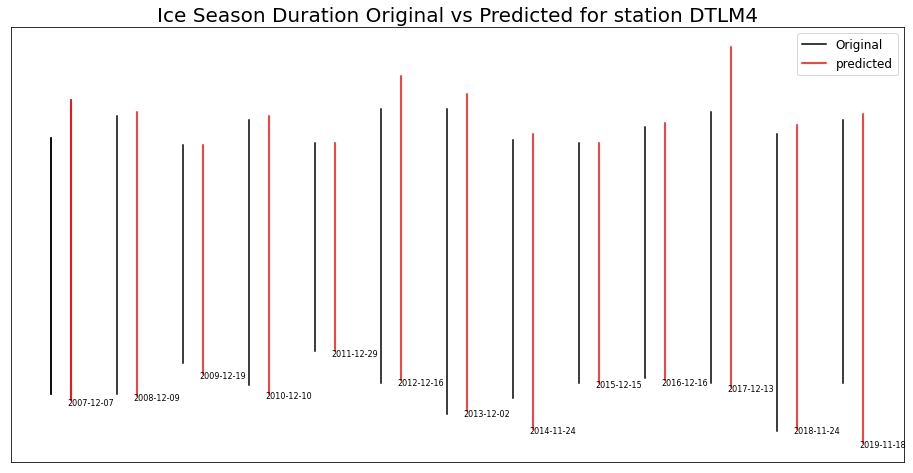

In [58]:
# Draw the Ice-on and Ice-off plots


df_original = df_actual_ice
df = df_predicted_ice

xValue_original = []
yValue_original = []
xValue = []
yValue = []
tick_spacing = 5

for i in range(1,len(df_original['year'])):
    if(int(df_original['Ice_off_date'][i].strftime("%m")) < 11):
        xValue_original.append(df_original['year'][i])
        xValue_original.append(df_original['year'][i])
    else:
        xValue_original.append(df_original['year'][i]+1)
        xValue_original.append(df_original['year'][i]+1)

for i in range(1,len(df['year'])):
    if(int(df['Ice_off_date'][i].strftime("%m")) < 11):
        xValue.append(df['year'][i])
        xValue.append(df['year'][i])
    else:
        xValue.append(df['year'][i]+1)
        xValue.append(df['year'][i]+1)
        
    
for i in range(0,(len(df_original['Ice_off_date'])-1)):
    if(int(df_original['Ice_on_date'][i].strftime("%m")) >= 11):
        start_date = datetime(int(df_original['Ice_on_date'][i].strftime("%Y")),11,1,0,0,0)
    yValue_original.append((df_original['Ice_on_date'][i]-start_date).days)
    yValue_original.append((df_original['Ice_off_date'][i+1]-start_date).days)

for i in range(0,(len(df['Ice_off_date'])-1)):
    if(int(df['Ice_on_date'][i].strftime("%m")) >= 11):
        start_date = datetime(int(df['Ice_on_date'][i].strftime("%Y")),11,1,0,0,0)
    else:
        start_date = datetime(int(df['Ice_on_date'][i].strftime("%Y"))-1,11,1,0,0,0)
    yValue.append((df['Ice_on_date'][i]-start_date).days)
    yValue.append((df['Ice_off_date'][i+1]-start_date).days)


      
plt.figure(figsize=(16,8))  

for i in range(0, int(len(xValue)/2)):

    plt.annotate(df['Ice_on_date'][i].strftime("%Y-%m-%d"),(xValue[2*i],yValue[2*i]), xytext=(xValue[2*i]+0.25,yValue[2*i] -2), fontsize=8)
#     plt.annotate(df['Ice_off_date'][i+1].strftime("%Y-%m-%d"),(xValue[2*i+1],yValue[2*i+1]), xytext=(xValue[2*i+1]-0.8,yValue[2*i+1]), fontsize=8)

    

# for i in range(0, int(len(xValue_original)/2)):
#     ice_on_point = plt.scatter(xValue_original[2*i], yValue_original[2*i], color = 'r', s=6. )
#     ice_off_point = plt.scatter(xValue_original[2*i+1], yValue_original[2*i+1], color = 'b', s=6.)
    
# for i in range(0, int(len(xValue)/2)):
#     ice_on_point = plt.scatter(xValue[2*i] + 0.3, yValue[2*i], color = 'y', s=6. )
#     ice_off_point = plt.scatter(xValue[2*i+1] + 0.3, yValue[2*i+1], color = 'g', s=6.)


# l2 = plt.legend([ice_on_point, ice_off_point], labels = ['Ice On Date', 'Ice Off Date'], bbox_to_anchor=(1.05, 0), loc=1, borderaxespad=0)            


    
for i in range(0, int(len(xValue_original)/2)):
    if(i==0):
        line1 = plt.plot([xValue_original[2*i], xValue_original[2*i+1]],[yValue_original[2*i], yValue_original[2*i+1]],  color ='k', label = 'Original')
        
    line1 = plt.plot([xValue_original[2*i], xValue_original[2*i+1]],[yValue_original[2*i], yValue_original[2*i+1]],  color ='k')

plt.legend()
    #     plt.annotate(df['Ice Duration'][i], ((xValue[2*i]+xValue[2*i+1])/2, (yValue[2*i]+yValue[2*i+1])/2), ((xValue[2*i]+xValue[2*i+1])/2+0.1, (yValue[2*i]+yValue[2*i+1])/2))
    
for j in range(0, int(len(xValue)/2)):
    if(j == 0):
        line2 = plt.plot([xValue[2*j] + 0.3, xValue[2*j+1]+0.3],[yValue[2*j], yValue[2*j+1]], label = 'predicted', color = 'r')
        
    line2 = plt.plot([xValue[2*j] + 0.3, xValue[2*j+1]+0.3],[yValue[2*j], yValue[2*j+1]], color = 'r')  

plt.legend(loc='upper right', fontsize = 12)
        
    
# plt.legend([line1, line2], labels=['Original', 'Predicted'], bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0)


# plt.gca().add_artist(l2)




plt.title('Ice Season Duration Original vs Predicted for station DTLM4' , fontsize=20)

# plt.axis('off')
plt.yticks([])


frame = plt.gca().axes.get_xaxis().set_visible(False)

plt.savefig('ice_duration_DTLM4.png')

In [59]:
#df_ml.to_csv('predicted_ice_on_off.csv', index = True)

In [60]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

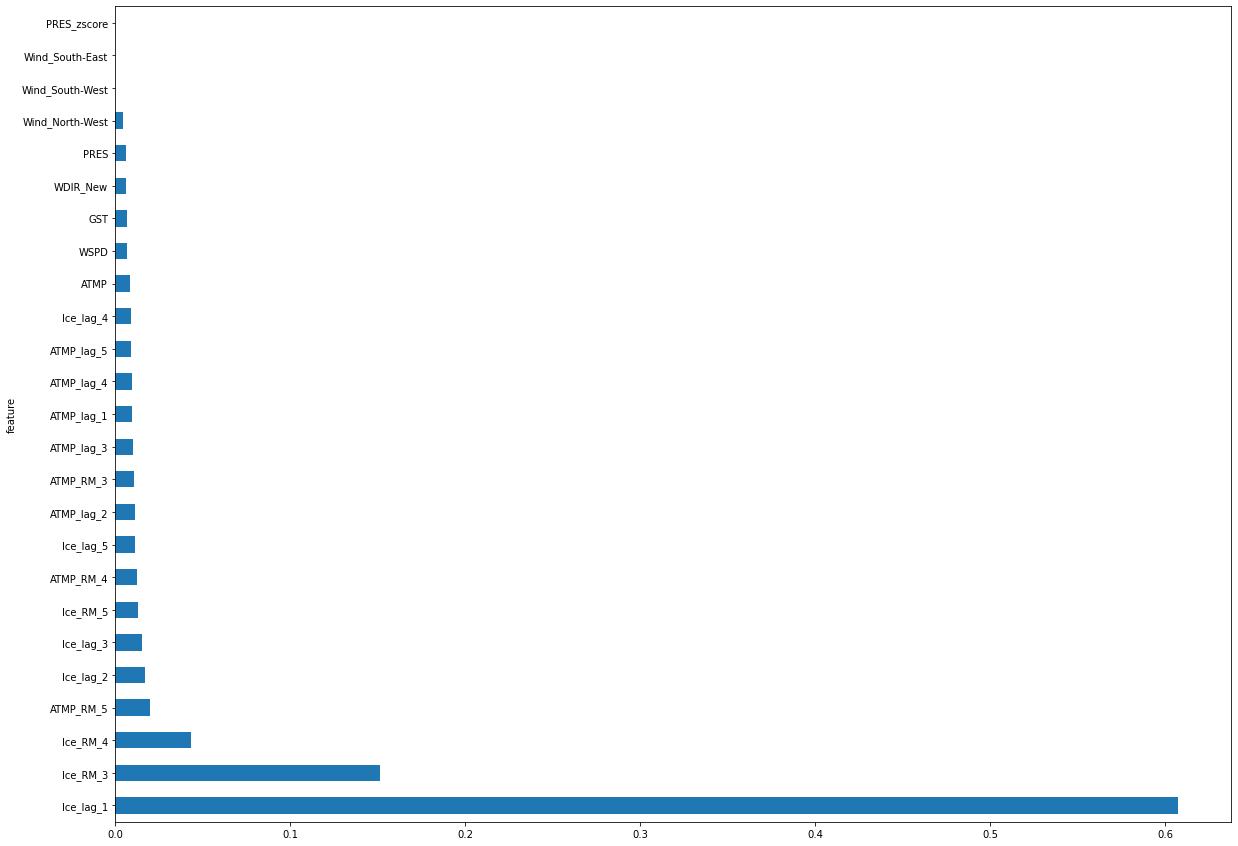

In [61]:
# Displaying the variable importance

%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
df_var_imp['importance'].plot(kind = 'barh')

In [62]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.607106
Ice_RM_3           0.151491
Ice_RM_4           0.043230
ATMP_RM_5          0.019847
Ice_lag_2          0.017084
Ice_lag_3          0.015140
Ice_RM_5           0.013205
ATMP_RM_4          0.012299
Ice_lag_5          0.011627
ATMP_lag_2         0.011431
ATMP_RM_3          0.010763
ATMP_lag_3         0.010305
ATMP_lag_1         0.009690
ATMP_lag_4         0.009444
ATMP_lag_5         0.008982
Ice_lag_4          0.008949
ATMP               0.008409
WSPD               0.006848
GST                0.006797
WDIR_New           0.006444
PRES               0.006387
Wind_North-West    0.004524
Wind_South-West    0.000000
Wind_South-East    0.000000
PRES_zscore        0.000000


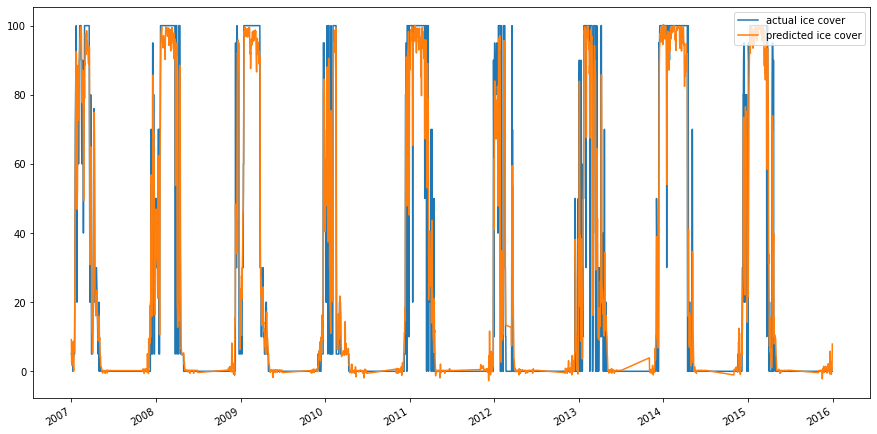

In [63]:
# Overlaying the training predictions on top of training data

plt.figure(figsize=(15,8))
df_train['DTLM'].plot(label = 'actual ice cover')
df_train['DTLM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [64]:
########################## Code for Baseline vs Actual vs Predicted Ice cover #######################

df_plot = pd.concat([df_train, df_test, df_valid], axis = 0)
df_plot = df_plot.drop(['WSPD', 'GST', 'PRES', 'ATMP', 'DTLM_Pred_RM_3'], axis = 1)
df_plot['year'] = df_plot.index.year
df_plot['month'] = df_plot.index.month
df_plot['day'] = df_plot.index.day

df_plot_2020 = df_plot[df_plot['year'] == 2020]
df_plot_rem = df_plot[df_plot['year'] <= 2019]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['DTLM'].mean().reset_index())
res = res.rename(columns = {'DTLM': 'DTLM_Baseline'})
df_plot_2020_final = df_plot_2020.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2020_final.index = df_plot_2020.index

df_plot_2019 = df_plot[df_plot['year'] == 2019]
df_plot_rem = df_plot[df_plot['year'] <= 2018]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['DTLM'].mean().reset_index())
res = res.rename(columns = {'DTLM': 'DTLM_Baseline'})
df_plot_2019_final = df_plot_2019.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2019_final.index = df_plot_2019.index

df_plot_2018 = df_plot[df_plot['year'] == 2018]
df_plot_rem = df_plot[df_plot['year'] <= 2017]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['DTLM'].mean().reset_index())
res = res.rename(columns = {'DTLM': 'DTLM_Baseline'})
df_plot_2018_final = df_plot_2018.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2018_final.index = df_plot_2018.index

df_plot_final = pd.concat([df_plot_2018_final, df_plot_2019_final, df_plot_2020_final], axis = 0)
df_plot_final

,DTLM,DTLM_Pred,year,month,day,DTLM_Baseline
2018-01-01,95.001221,95.481323,2018,1,1,46.818125
2018-01-02,95.001221,94.344223,2018,1,2,46.817431
2018-01-03,95.001221,92.738571,2018,1,3,59.545342
2018-01-04,99.998466,91.386276,2018,1,4,50.453879
2018-01-05,99.998466,94.870132,2018,1,5,49.453040
...,...,...,...,...,...,...
2020-05-19,0.000000,1.894211,2020,5,19,0.000000
2020-05-20,0.000000,2.608268,2020,5,20,0.000000
2020-05-21,0.000000,2.594292,2020,5,21,0.000000
2020-05-22,0.000000,2.608268,2020,5,22,0.000000


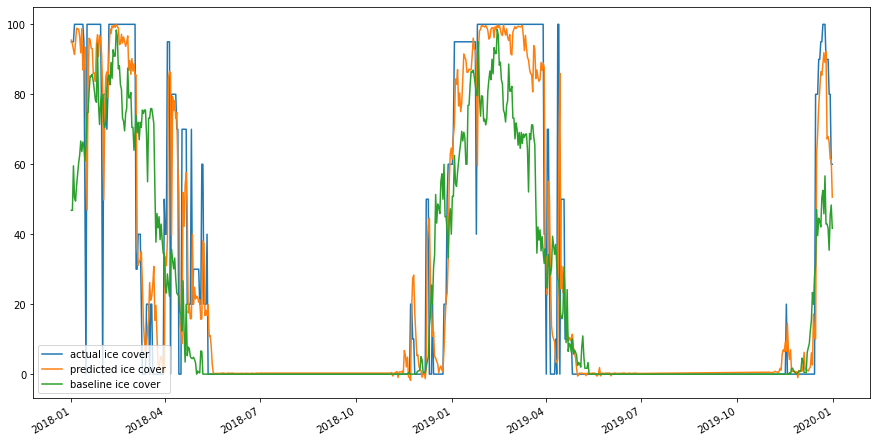

In [65]:
# Overlaying the 2018 and 2019 predictions and baseline on top of actual data

plt.figure(figsize=(15,8))
df_subset_2020 = df_plot_final.loc['2018-01-01':'2020-12-31']
df_subset = df_plot_final.loc['2018-01-01':'2019-12-31']
df_subset['DTLM'].plot(label = 'actual ice cover')
df_subset['DTLM_Pred'].plot(label = 'predicted ice cover')
df_subset['DTLM_Baseline'].plot(label = 'baseline ice cover')
plt.legend(loc="lower left")

In [66]:
df_dtlm4_2018_2019 = df_subset_2020

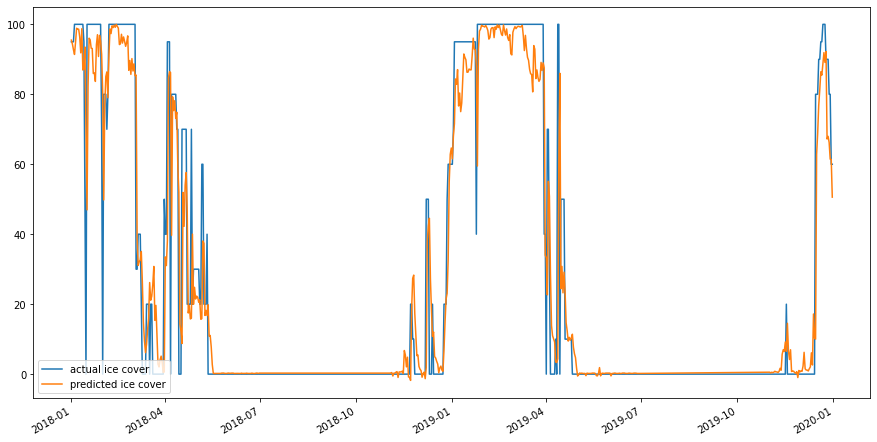

In [67]:
# Overlaying the 2018 and 2019 predictions on top of actual data

plt.figure(figsize=(15,8))
df_subset = df_plot_final.loc['2018-01-01':'2019-12-31']
df_subset['DTLM'].plot(label = 'actual ice cover')
df_subset['DTLM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="lower left")

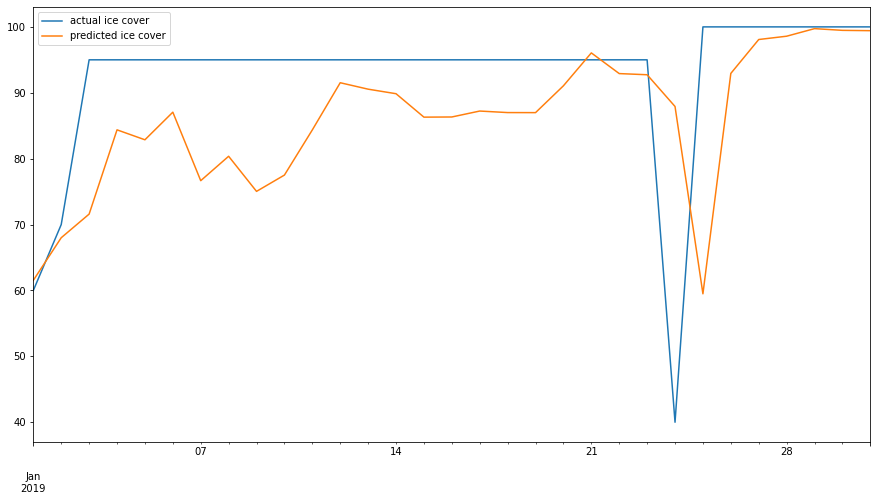

In [68]:
# Overlaying January 2019 predictions on top of actual data for January 2019

plt.figure(figsize=(15,8))
df_subset = df_test.loc['2019-01-01':'2019-01-31']
df_subset['DTLM'].plot(label = 'actual ice cover')
df_subset['DTLM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="upper left")

In [69]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-02-01 as the split date

split_date = '2019-02-01'

df_merge_1 = df_merge[['DTLM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5',  
                      'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_merge_train = df_merge_1.loc[df_merge.index < split_date].copy()
df_merge_test = df_merge_1.loc[df_merge.index == split_date].copy()

X_train = df_merge_train.drop(['DTLM'], axis = 1)
X_test = df_merge_test.drop(['DTLM'], axis = 1)
y_train = df_merge_train['DTLM']
y_test = df_merge_test['DTLM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(2913, 13) (2913,)
(1, 13) (1,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.6s finished


0.8321515166410858
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [70]:
### Predict ice cover on the day of the test data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([98.88482], dtype=float32)

In [71]:
### Actual ice cover on the day of the test data

y_test

2019-02-01    99.998466
Name: DTLM, dtype: float64

In [72]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

1.1136474609375


In [73]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [74]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_merge_test = df_merge_1.loc[df_merge.index == res].copy()
    
    y_test = df_merge_test['DTLM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-02-02 2019-02-02    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-03 2019-02-03    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-04 2019-02-04    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-05 2019-02-05    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-06 2019-02-06    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-07 2019-02-07    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-08 2019-02-08    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-09 2019-02-09    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-10 2019-02-10    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-11 2019-02-11    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-12 2019-02-12    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-13 2019-02-13    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-14 2019-02-14    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-15 2019-02-15    99.998466
Name: DTLM, dtyp

In [75]:
print(mean_absolute_error(y_test, y_test_pred))

1.1136474609375


In [76]:
######### Using the predicted value on any date as ground truth and forecasting for next 7 days #################

for i in range(1, 8):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_merge_test = df_merge_1.loc[df_merge.index == res].copy()
    
    y_test = df_merge_test['DTLM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-02-02 2019-02-02    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-03 2019-02-03    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-04 2019-02-04    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-05 2019-02-05    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-06 2019-02-06    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-07 2019-02-07    99.998466
Name: DTLM, dtype: float64 [98.88482]
2019-02-08 2019-02-08    99.998466
Name: DTLM, dtype: float64 [98.88482]


In [77]:
df_merge['year'] = pd.DatetimeIndex(df_merge.index).year
df_merge['month'] = pd.DatetimeIndex(df_merge.index).month
df_merge['day'] = pd.DatetimeIndex(df_merge.index).day
df_merge.head()

,WSPD,GST,PRES,ATMP,DTLM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore,year,month,day
2007-01-01,4.230962,7.210460,1002.065823,2.865272,4.997253,47.338912,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.674697,2007,1,1
2007-01-02,3.089121,5.180335,1020.045607,0.913983,4.997253,77.075314,0,0,1,2.865272,...,NaN,NaN,NaN,NaN,NaN,NaN,0.607529,2007,1,2
2007-01-03,3.974167,6.915833,1012.742917,3.069583,4.997253,35.150000,0,0,1,0.913983,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.319422,2007,1,3
2007-01-04,3.419247,5.260669,1005.601255,4.332218,4.997253,12.661088,0,0,1,3.069583,...,2.282946,NaN,NaN,4.997253,NaN,NaN,-1.225934,2007,1,4
2007-01-05,2.280417,3.455000,1001.480342,4.954167,3.997803,34.762500,0,0,1,4.332218,...,2.771928,2.795264,NaN,4.997253,4.997253,NaN,-1.749014,2007,1,5


In [78]:
########## Freezing Phase: Nov 25 - Jan 30
########## Stable Phase: Jan 31 - Mar 25
########## Melting Phase: Mar 26 - May 30
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_freezing = df_merge[df_merge['month'].isin([11, 12, 1])]
df_freezing = df_freezing[~((df_freezing['month'] == 11) & (df_freezing['day'] < 1))]
df_freezing = df_freezing[~((df_freezing['month'] == 1) & (df_freezing['day'] > 14))]

In [79]:
df_stable = df_merge[df_merge['month'].isin([1, 2, 3])]
df_stable = df_stable[~((df_stable['month'] == 1) & (df_stable['day'] < 15))]
df_stable = df_stable[~((df_stable['month'] == 3) & (df_stable['day'] > 25))]

In [80]:
df_melting = df_merge[df_merge['month'].isin([3, 4, 5])]
df_melting = df_melting[~((df_melting['month'] == 3) & (df_melting['day'] < 26))]
df_melting = df_melting[~((df_melting['month'] == 5) & (df_melting['day'] > 10))]

In [81]:
df_freezing.head()

,WSPD,GST,PRES,ATMP,DTLM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,ATMP_lag_2,ATMP_lag_3,ATMP_lag_4,ATMP_lag_5,Ice_lag_1,Ice_lag_2,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore,year,month,day
2007-01-01,4.230962,7.210460,1002.065823,2.865272,4.997253,47.338912,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.674697,2007,1,1
2007-01-02,3.089121,5.180335,1020.045607,0.913983,4.997253,77.075314,0,0,1,2.865272,NaN,NaN,NaN,NaN,4.997253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607529,2007,1,2
2007-01-03,3.974167,6.915833,1012.742917,3.069583,4.997253,35.150000,0,0,1,0.913983,2.865272,NaN,NaN,NaN,4.997253,4.997253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.319422,2007,1,3
2007-01-04,3.419247,5.260669,1005.601255,4.332218,4.997253,12.661088,0,0,1,3.069583,0.913983,2.865272,NaN,NaN,4.997253,4.997253,4.997253,NaN,NaN,2.282946,NaN,NaN,4.997253,NaN,NaN,-1.225934,2007,1,4
2007-01-05,2.280417,3.455000,1001.480342,4.954167,3.997803,34.762500,0,0,1,4.332218,3.069583,0.913983,2.865272,NaN,4.997253,4.997253,4.997253,4.997253,NaN,2.771928,2.795264,NaN,4.997253,4.997253,NaN,-1.749014,2007,1,5


#### Training XGBoost Model on freezing period DTLM4

In [82]:
# Separating the Independent and dependent variables

X = df_freezing.drop(['DTLM'], axis = 1)
y = df_freezing['DTLM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [83]:
########## Freezing Phase: Dec 01 – Jan 14
########## Stable Phase: Jan 15 – Apr 05
########## Melting Phase: Apr 06 – May 30
X_train = X['2007-11-01':'2015-01-14']
X_test = X['2016-11-01':'2020-01-14']
y_train = y['2007-11-01':'2015-01-14']
y_test = y['2016-11-01':'2020-01-14']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(600, 25) (600,)
(299, 25) (299,)


In [84]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   11.7s finished


0.5351081419725856
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 12.07 seconds


In [85]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

8.987662066419919


In [86]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

9.183625303283582


In [87]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [88]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [89]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [90]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.320419
Ice_RM_3           0.159140
Ice_RM_4           0.101747
Ice_RM_5           0.063427
Ice_lag_4          0.043006
Ice_lag_3          0.025393
Wind_South-West    0.024017
ATMP_RM_5          0.023744
Ice_lag_2          0.023124
ATMP               0.020952
ATMP_RM_3          0.020856
Ice_lag_5          0.020810
ATMP_RM_4          0.019101
ATMP_lag_5         0.016656
ATMP_lag_3         0.015990
PRES               0.015927
ATMP_lag_1         0.015305
GST                0.014766
ATMP_lag_2         0.013683
ATMP_lag_4         0.013382
WSPD               0.011439
WDIR_New           0.011307
Wind_North-West    0.005808
Wind_South-East    0.000000
PRES_zscore        0.000000


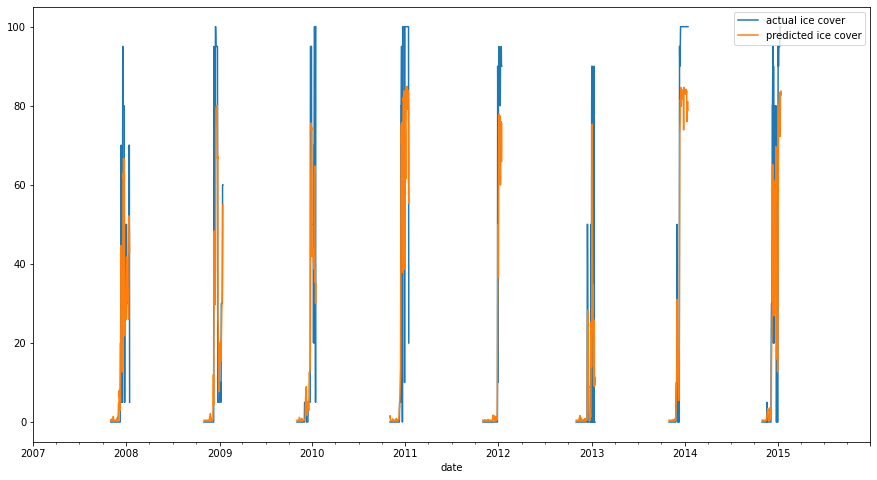

In [91]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'DTLM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['DTLM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['DTLM'].plot(label = 'actual ice cover')
y_train_pred['DTLM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [92]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-01-01 as the 
### test data set.

split_date = '2019-01-01'

df_freeze_1 = df_freezing[['DTLM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                           'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                           'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_freeze_train = df_freeze_1.loc[df_freezing.index < split_date].copy()
df_freeze_test = df_freeze_1.loc[df_freezing.index == split_date].copy()

X_train = df_freeze_train.drop(['DTLM'], axis = 1)
X_test = df_freeze_test.drop(['DTLM'], axis = 1)
y_train = df_freeze_train['DTLM']
y_test = df_freeze_test['DTLM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(899, 13) (899,)
(1, 13) (1,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s


0.7829149317043322
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.2s finished


In [93]:
### Predict ice cover on the day of the test data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([56.9876], dtype=float32)

In [94]:
### Actual ice cover on the day of the test data

y_test

2019-01-01    59.997559
Name: DTLM, dtype: float64

In [95]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

3.009960174560547


In [96]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [97]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_freeze_test = df_freeze_1.loc[df_freeze_1.index == res].copy()
    
    y_test = df_freeze_test['DTLM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-01-02 2019-01-02    69.999687
Name: DTLM, dtype: float64 [56.9876]
2019-01-03 2019-01-03    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-04 2019-01-04    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-05 2019-01-05    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-06 2019-01-06    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-07 2019-01-07    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-08 2019-01-08    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-09 2019-01-09    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-10 2019-01-10    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-11 2019-01-11    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-12 2019-01-12    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-13 2019-01-13    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-14 2019-01-14    95.001221
Name: DTLM, dtype: float64 [56.9876]
2019-01-15 Series([], Name: DTLM, dtype: float64) [56.9876]


#### Training XGBoost Model on stable period DTLM4

In [98]:
# Separating the Independent and dependent variables

X = df_stable.drop(['DTLM'], axis = 1)
y = df_stable['DTLM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [99]:
########## Freezing Phase: Nov 01 – Jan 14
########## Stable Phase: Jan 15 – Mar 25
########## Melting Phase: Mar 26 – May 10
X_train = X['2007-01-15':'2015-03-25']
X_test = X['2016-01-15':'2020-03-25']
y_train = y['2007-01-15':'2015-03-25']
y_test = y['2016-01-15':'2020-03-25']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(610, 25) (610,)
(352, 25) (352,)


In [100]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.8],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.9s


0.11776093144379822
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 20.79 seconds


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   20.6s finished


In [101]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

5.1563276199898755


In [102]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

18.552929216233846


In [103]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [104]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [105]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [106]:
print(df_var_imp)

                 importance
feature                    
Ice_RM_3           0.275255
Ice_lag_1          0.212825
ATMP_lag_2         0.034584
ATMP_lag_3         0.032566
Ice_lag_5          0.030542
PRES_zscore        0.027235
ATMP_RM_4          0.027219
Ice_lag_3          0.026374
ATMP_RM_5          0.025129
PRES               0.025033
ATMP_lag_5         0.024468
Ice_RM_5           0.024388
ATMP               0.024037
WDIR_New           0.023902
GST                0.022508
Ice_lag_4          0.020740
ATMP_lag_4         0.020265
Wind_South-West    0.019200
ATMP_lag_1         0.017346
ATMP_RM_3          0.017107
Ice_RM_4           0.016506
Ice_lag_2          0.015580
WSPD               0.015066
Wind_North-West    0.011416
Wind_South-East    0.010711


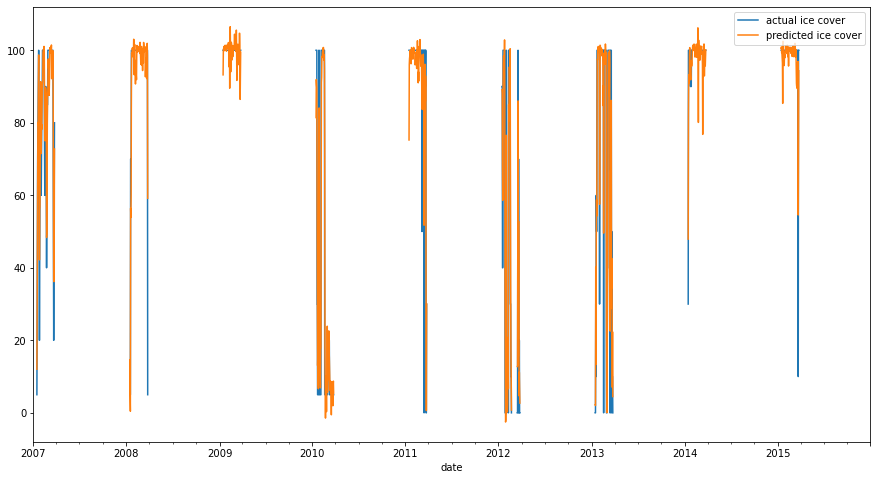

In [107]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'DTLM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['DTLM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['DTLM'].plot(label = 'actual ice cover')
y_train_pred['DTLM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [108]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-03-01 as the 
### test data set.

split_date = '2019-03-01'

df_stable_1 = df_stable[['DTLM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                         'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                         'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_stable_train = df_stable_1.loc[df_stable_1.index < split_date].copy()
df_stable_test = df_stable_1.loc[df_stable_1.index == split_date].copy()

X_train = df_stable_train.drop(['DTLM'], axis = 1)
X_test = df_stable_test.drop(['DTLM'], axis = 1)
y_train = df_stable_train['DTLM']
y_test = df_stable_test['DTLM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.6],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(866, 13) (866,)
(1, 13) (1,)
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   13.0s


0.6041183616557202
{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   16.9s finished


In [109]:
### Predict ice cover on the day of the testation data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([98.78974], dtype=float32)

In [110]:
### Actual ice cover on the day of the testation data

y_test

2019-03-01    99.998466
Name: DTLM, dtype: float64

In [111]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

1.2087249755859375


In [112]:
X_test

,Ice_lag_1,Ice_RM_3,Ice_RM_4,Ice_RM_5,ATMP_RM_4,ATMP_RM_3,ATMP_RM_5,Ice_lag_2,ATMP_lag_4,ATMP,Ice_lag_3,Ice_lag_4,Ice_lag_5
2019-03-01,99.998466,99.998466,99.998466,99.998466,-11.707289,-12.759264,-9.363527,99.998466,-8.551364,-7.225676,99.998466,99.998466,99.998466


In [113]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_stable_test = df_stable_1.loc[df_stable_1.index == res].copy()
    
    y_test = df_stable_test['DTLM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-03-02 2019-03-02    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-03 2019-03-03    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-04 2019-03-04    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-05 2019-03-05    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-06 2019-03-06    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-07 2019-03-07    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-08 2019-03-08    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-09 2019-03-09    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-10 2019-03-10    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-11 2019-03-11    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-12 2019-03-12    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-13 2019-03-13    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-14 2019-03-14    99.998466
Name: DTLM, dtype: float64 [98.78974]
2019-03-15 2019-03-15    99.998466
Name: DTLM, dtyp

In [114]:
y_test

2019-03-15    99.998466
Name: DTLM, dtype: float64

#### Training XGBoost Model on melting period DTLM4

In [115]:
# Separating the Independent and dependent variables

X = df_melting.drop(['DTLM'], axis = 1)
y = df_melting['DTLM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [116]:
########## Freezing Phase: Nov 01 – Jan 14
########## Stable Phase: Jan 15 – Mar 25
########## Melting Phase: Mar 26 – May 10
X_train = X['2007-03-26':'2015-05-10']
X_test = X['2016-03-26':'2020-05-10']
y_train = y['2007-03-26':'2015-05-10']
y_test = y['2016-03-26':'2020-05-10']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(412, 25) (412,)
(229, 25) (229,)


In [117]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.8],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.3s


0.19795293152105495
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 17.45 seconds


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   17.2s finished


In [118]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

11.13884837621624


In [119]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

14.504258835159535


In [120]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [121]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [122]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [123]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.270886
Ice_RM_3           0.143005
Ice_lag_2          0.104245
Ice_RM_4           0.062997
PRES_zscore        0.034826
Ice_RM_5           0.032714
ATMP_RM_4          0.028796
ATMP_RM_5          0.027170
PRES               0.026193
ATMP_RM_3          0.024530
ATMP_lag_1         0.024105
ATMP_lag_3         0.023503
ATMP_lag_2         0.022798
ATMP               0.022377
WDIR_New           0.021671
Ice_lag_4          0.021650
Ice_lag_5          0.021537
ATMP_lag_5         0.020068
Ice_lag_3          0.016865
Wind_South-West    0.016114
WSPD               0.012298
GST                0.011713
ATMP_lag_4         0.009939
Wind_South-East    0.000000
Wind_North-West    0.000000


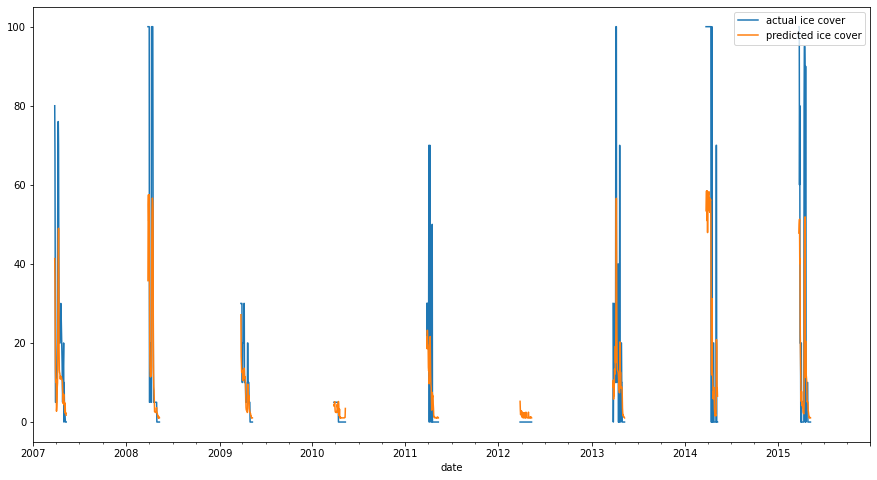

In [124]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'DTLM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['DTLM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['DTLM'].plot(label = 'actual ice cover')
y_train_pred['DTLM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [125]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-04-20 as the test data set.

split_date = '2019-04-20'

df_melting_1 = df_melting[['DTLM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                           'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                           'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_melting_train = df_melting_1.loc[df_melting_1.index < split_date].copy()
df_melting_test = df_melting_1.loc[df_melting_1.index == split_date].copy()

X_train = df_melting_train.drop(['DTLM'], axis = 1)
X_test = df_melting_test.drop(['DTLM'], axis = 1)
y_train = df_melting_train['DTLM']
y_test = df_melting_test['DTLM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.6],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(574, 13) (574,)
(1, 13) (1,)
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.3s


0.40400829288029916
{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   14.0s finished


In [126]:
### Predict ice cover on the day of the testation data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([16.450018], dtype=float32)

In [127]:
### Actual ice cover on the day of the testation data

y_test

2019-04-20    10.00214
Name: DTLM, dtype: float64

In [128]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

6.447877883911129


In [129]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [130]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_melting_test = df_melting_1.loc[df_melting_1.index == res].copy()
    
    y_test = df_melting_test['DTLM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-04-21 2019-04-21    10.00214
Name: DTLM, dtype: float64 [15.905738]
2019-04-22 2019-04-22    10.00214
Name: DTLM, dtype: float64 [14.681433]
2019-04-23 2019-04-23    10.00214
Name: DTLM, dtype: float64 [11.528617]
2019-04-24 2019-04-24    10.00214
Name: DTLM, dtype: float64 [9.973541]
2019-04-25 2019-04-25    10.00214
Name: DTLM, dtype: float64 [7.9704432]
2019-04-26 2019-04-26    0.0
Name: DTLM, dtype: float64 [7.19673]
2019-04-27 2019-04-27    0.0
Name: DTLM, dtype: float64 [6.6763535]
2019-04-28 2019-04-28    0.0
Name: DTLM, dtype: float64 [4.0686283]
2019-04-29 2019-04-29    0.0
Name: DTLM, dtype: float64 [3.628627]
2019-04-30 2019-04-30    0.0
Name: DTLM, dtype: float64 [3.4376643]
2019-05-01 2019-05-01    0.0
Name: DTLM, dtype: float64 [3.4376643]
2019-05-02 2019-05-02    0.0
Name: DTLM, dtype: float64 [3.4376643]
2019-05-03 2019-05-03    0.0
Name: DTLM, dtype: float64 [3.8540537]
2019-05-04 2019-05-04    0.0
Name: DTLM, dtype: float64 [3.8540537]


In [131]:
df_dtlm4_2018_2019.head()

,DTLM,DTLM_Pred,year,month,day,DTLM_Baseline
2018-01-01,95.001221,95.481323,2018,1,1,46.818125
2018-01-02,95.001221,94.344223,2018,1,2,46.817431
2018-01-03,95.001221,92.738571,2018,1,3,59.545342
2018-01-04,99.998466,91.386276,2018,1,4,50.453879
2018-01-05,99.998466,94.870132,2018,1,5,49.453040


In [132]:
df_dtlm4_2018_2019.tail()

,DTLM,DTLM_Pred,year,month,day,DTLM_Baseline
2020-05-19,0.0,1.894211,2020,5,19,0.0
2020-05-20,0.0,2.608268,2020,5,20,0.0
2020-05-21,0.0,2.594292,2020,5,21,0.0
2020-05-22,0.0,2.608268,2020,5,22,0.0
2020-05-23,0.0,2.594292,2020,5,23,0.0


In [133]:
df_dtlm4_2018_2019 = df_dtlm4_2018_2019.drop(['year', 'month', 'day'], axis = 1)

In [134]:
df_dtlm4_2018_2019.head()

,DTLM,DTLM_Pred,DTLM_Baseline
2018-01-01,95.001221,95.481323,46.818125
2018-01-02,95.001221,94.344223,46.817431
2018-01-03,95.001221,92.738571,59.545342
2018-01-04,99.998466,91.386276,50.453879
2018-01-05,99.998466,94.870132,49.453040


In [135]:
df_dtlm4_2018_2019.tail()

,DTLM,DTLM_Pred,DTLM_Baseline
2020-05-19,0.0,1.894211,0.0
2020-05-20,0.0,2.608268,0.0
2020-05-21,0.0,2.594292,0.0
2020-05-22,0.0,2.608268,0.0
2020-05-23,0.0,2.594292,0.0


In [136]:
df_dtlm4_2018_2019.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/DTLM4_2018_2019.csv', index = True, header=True)

In [137]:
df_icedur_pred_dtlm4.head()

,year,Ice_off_date,Ice_on_date,duration
0,2007,2007-04-02,2007-12-07,135 days
1,2008,2008-04-20,2008-12-09,128 days
2,2009,2009-04-16,2009-12-19,103 days
3,2010,2010-04-01,2010-12-10,125 days
4,2011,2011-04-14,2011-12-29,94 days


In [138]:
df_icedur_pred_dtlm4 = df_icedur_pred_dtlm4.drop(['duration'],axis=1)

In [139]:
df_icedur_pred_dtlm4.head()

,year,Ice_off_date,Ice_on_date
0,2007,2007-04-02,2007-12-07
1,2008,2008-04-20,2008-12-09
2,2009,2009-04-16,2009-12-19
3,2010,2010-04-01,2010-12-10
4,2011,2011-04-14,2011-12-29


In [140]:
df_icedur_pred_dtlm4.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/DTLM4_icedur_pred.csv', index = False, header=True)

In [141]:
df_icedur_act_dtlm4.head()

,year,Ice_off_date,Ice_on_date,duration
0,2007,2007-04-01,2007-12-10,115 days
1,2008,2008-04-03,2008-12-10,125 days
2,2009,2009-04-14,2009-12-24,98 days
3,2010,2010-04-01,2010-12-14,119 days
4,2011,2011-04-12,2011-12-29,94 days


In [142]:
df_icedur_act_dtlm4 = df_icedur_act_dtlm4.drop(['duration'],axis=1)

In [143]:
df_icedur_act_dtlm4.head()

,year,Ice_off_date,Ice_on_date
0,2007,2007-04-01,2007-12-10
1,2008,2008-04-03,2008-12-10
2,2009,2009-04-14,2009-12-24
3,2010,2010-04-01,2010-12-14
4,2011,2011-04-12,2011-12-29


In [144]:
df_icedur_act_dtlm4.tail()

,year,Ice_off_date,Ice_on_date
9,2016,2016-04-01,2016-12-17
10,2017,2017-04-09,2017-12-15
11,2018,2018-04-16,2018-11-23
12,2019,2019-04-06,2019-12-15
13,2020,2020-04-11,NaT


In [145]:
df_icedur_act_dtlm4.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/DTLM4_icedur_act.csv', index = False, header=True)